In [103]:
import pandas as pd
import numpy as np
from collections import Counter as c

# Load Data Set

pd.options.display.max_columns = 250
pd.options.display.max_rows = 2000
pd.options.display.float_format = '{:.2f}'.format

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

# from lazypredict.Supervised import LazyClassifier

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor # why?
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


from xgboost import XGBRegressor , XGBRFRegressor
import lightgbm as lgb
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier

from matplotlib.pyplot import plot

import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt, rcParams as rc


%matplotlib inline
rc["figure.figsize"] = 10,6


from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [65]:
car = pd.read_csv("car_data.csv")
house = pd.read_csv("house_price.csv")

In [3]:
car.shape, house.shape

((301, 9), (198, 3))

In [4]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
house.head()

,price,bedrooms,city
0,313000,3,Shoreline
1,2384000,5,Seattle
2,342000,3,Kent
3,420000,3,Bellevue
4,550000,4,Redmond


In [9]:
print(c(car.Owner))

print(c(car.Transmission))

print(c(car.Seller_Type))

print(c(car.Fuel_Type))
# print(c(car.Car_Name))

Counter({0: 290, 1: 10, 3: 1})
Counter({'Manual': 261, 'Automatic': 40})
Counter({'Dealer': 195, 'Individual': 106})
Counter({'Petrol': 239, 'Diesel': 60, 'CNG': 2})


In [ ]:
plot.ba

In [10]:
print(c(house.bedrooms))

print(c(house.city))

Counter({3: 84, 4: 68, 2: 26, 5: 17, 6: 2, 7: 1})
Counter({'Seattle': 68, 'Issaquah': 15, 'Bellevue': 14, 'Renton': 13, 'Redmond': 12, 'Kirkland': 11, 'Sammamish': 8, 'Shoreline': 7, 'Auburn': 6, 'Federal Way': 6, 'Des Moines': 5, 'Kent': 4, 'North Bend': 4, 'Snoqualmie': 4, 'Kenmore': 4, 'Maple Valley': 3, 'Bothell': 2, 'Woodinville': 2, 'Carnation': 2, 'Burien': 2, 'Lake Forest Park': 1, 'Normandy Park': 1, 'Fall City': 1, 'Duvall': 1, 'Covington': 1, 'Inglewood-Finn Hill': 1})


In [17]:
def visualize_histogram(dataset):
    plt.figure(figsize=(25, 9))  # figure size in ratio 16:9
    features = dataset.columns  # list of columns name
    for i, j in enumerate(features):
        plt.subplot(3, 3, i + 1)  # create subplot for histogram
        plt.title("Histogram of {}".format(j), fontsize=15)  # title of histogram

        bins = len(dataset[j].unique())  # bins for histogram
        plt.hist(dataset[j], bins=bins, rwidth=0.8, edgecolor="y", linewidth=2, )  # plot histogram

    plt.subplots_adjust(hspace=0.5)  # space between horixontal axes (subplots)

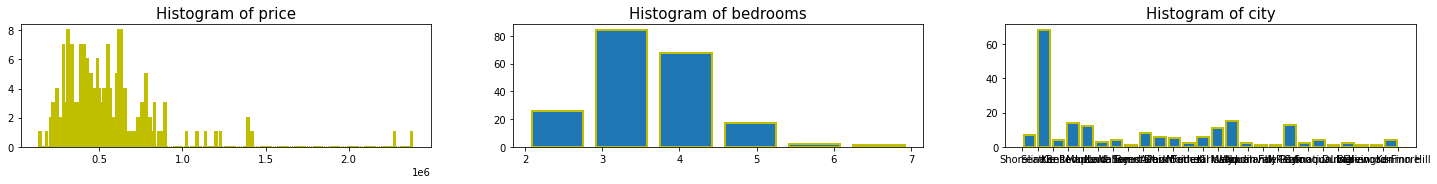

In [18]:
visualize_histogram(house)

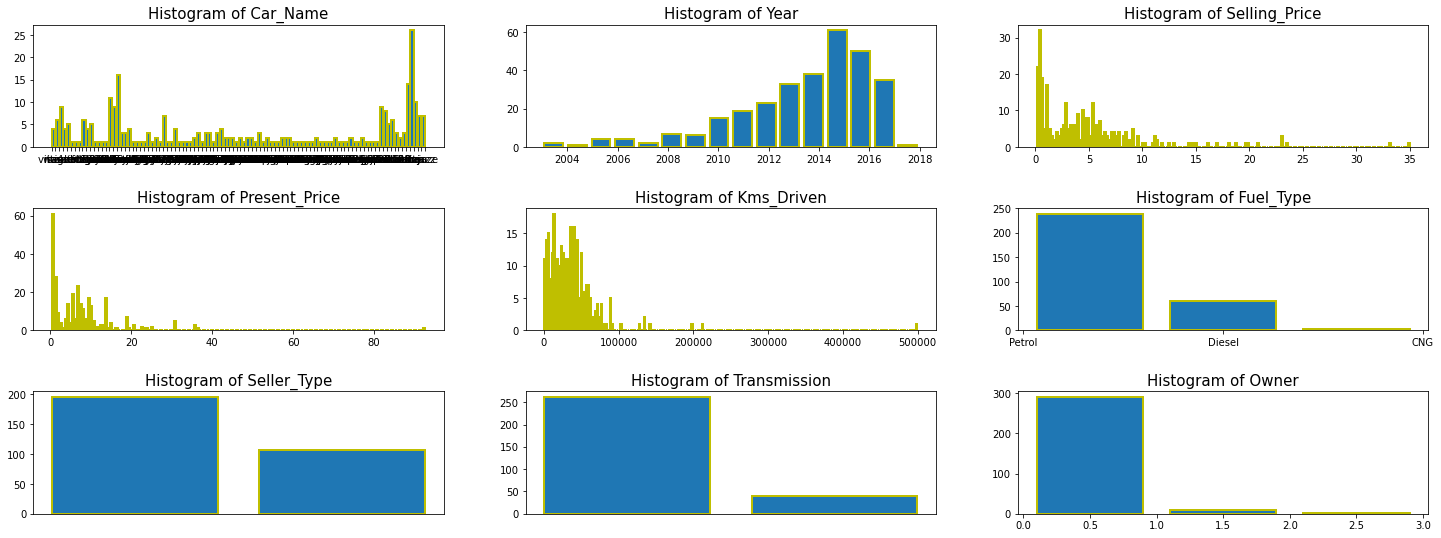

In [19]:
visualize_histogram(car)

In [20]:
def corr_metrix(dataset):
    corr = dataset.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))# Set up the matplotlib figure

    cmap = sns.diverging_palette(220, 10, as_cmap='RdYlGn')    # Generate a custom diverging colormap

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
    


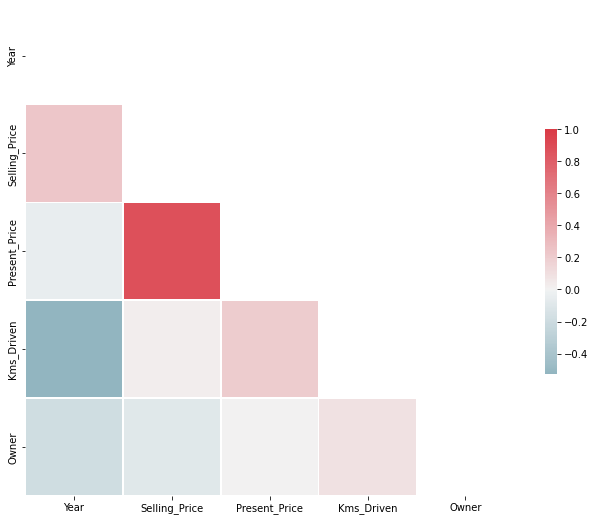

In [21]:
corr_metrix(car)

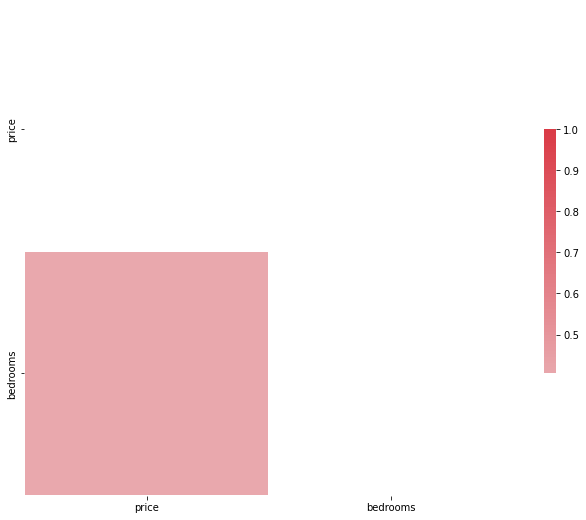

In [22]:
corr_metrix(house)

In [23]:
def corr_2_more_visualize(dataset):
    corr = dataset.corr()
    
    f, ax = plt.subplots(figsize=(20, 9))
    sns.heatmap(corr.apply(lambda x : np.round(x,2)), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True,cmap='RdYlGn', annot_kws={"size": 15})
    ax.tick_params(labelsize=20)
    plt.show()

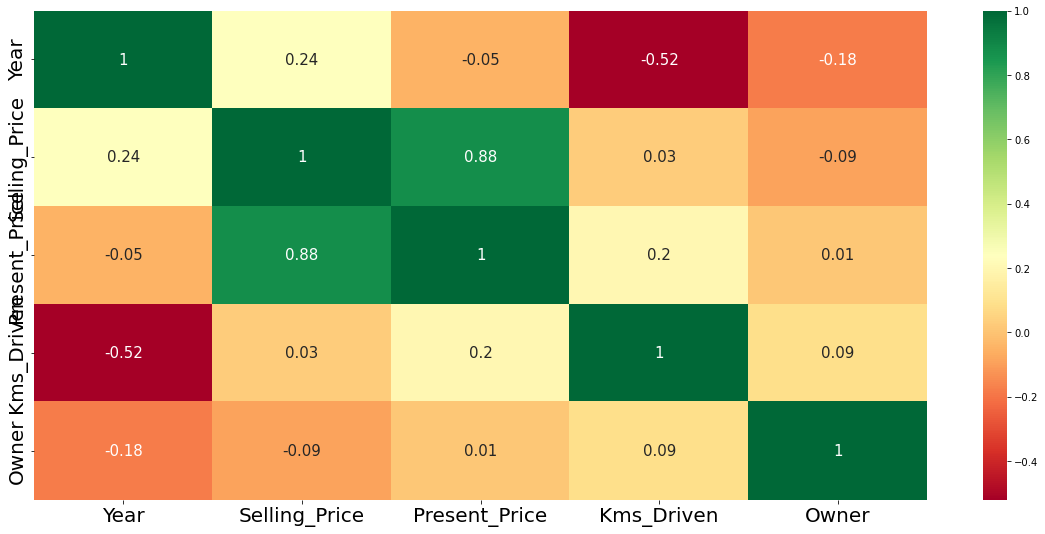

In [24]:
corr_2_more_visualize(car)

In [25]:
house.head()

,price,bedrooms,city
0,313000,3,Shoreline
1,2384000,5,Seattle
2,342000,3,Kent
3,420000,3,Bellevue
4,550000,4,Redmond


In [26]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     198 non-null    int64 
 1   bedrooms  198 non-null    int64 
 2   city      198 non-null    object
dtypes: int64(2), object(1)
memory usage: 4.8+ KB


In [27]:
house.describe()

,price,bedrooms
count,198.00,198.00
mean,538875.32,3.43
std,291445.94,0.90
min,136500.00,2.00
25%,365000.00,3.00
50%,483500.00,3.00
75%,625750.00,4.00
max,2384000.00,7.00


In [31]:
#EDA

def understanding_dataset(dataset):
    print(f"Shape: {dataset.shape}")
    print(f"Total Missing Value in Dataset: {dataset.isna().sum().sum()}")
    
    for column in dataset.columns:
        print(f"===============Column: {column} ==============")
        print(f"Number of unique values: {dataset[column].nunique()}")
        print(f"Max: {dataset[column].max()}")
        print(f"Min: {dataset[column].min()}")
        
        if(dataset[column].isna().any()):
            print(f"Missing Value: {round((data[[column]].isna().sum() / len(data) ) * 100 , 2)}")
    
        print("\n")

def get_percentage_miss_value(dataset):
    higher_miss_value_column = []
    miss_threshold_value = 30
    
    for i in dataset.columns:
        if dataset[i].isna().sum() > 1: 
            perectange_val = (dataset[i].isna().sum() / len(dataset)) * 100
            print("Column-> " , i, ", total no of missing value : ",dataset[i].isna().sum() , " & :         ", round(perectange_val,2) ," %")
                
            if(perectange_val > miss_threshold_value):
                higher_miss_value_column.append(i)
            
    print("\n\n\n")
    
    if higher_miss_value_column:
        print("Higher Missing values in Columns Name : ", higher_miss_value_column)
    else:
        print("There are no Higher Column Missing values in Dataset")
        

In [32]:
understanding_dataset(house)

Shape: (198, 3)
Total Missing Value in Dataset: 0
===============Column: price ==============
Number of unique values: 176
Max: 2384000
Min: 136500


===============Column: bedrooms ==============
Number of unique values: 6
Max: 7
Min: 2


===============Column: city ==============
Number of unique values: 26
Max: Woodinville
Min: Auburn




In [34]:
get_percentage_miss_value(house)





There are no Higher Column Missing values in Dataset


In [30]:
house.isna().sum()

price       0
bedrooms    0
city        0
dtype: int64

In [37]:
def check_cloumn_details_type_categorical(dataset):
    for i in dataset.columns:
        if(dataset[i].dtype == "object"):
            print("Columns name :  ",i  )
            
            print(dict(c(dataset[i])))
            
            print("*"*100)
            print("\n")

In [39]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [40]:
check_cloumn_details_type_categorical(car)

Columns name :   Car_Name
{'ritz': 4, 'sx4': 6, 'ciaz': 9, 'wagon r': 4, 'swift': 5, 'vitara brezza': 1, 's cross': 1, 'alto 800': 1, 'ertiga': 6, 'dzire': 4, 'alto k10': 5, 'ignis': 1, '800': 1, 'baleno': 1, 'omni': 1, 'fortuner': 11, 'innova': 9, 'corolla altis': 16, 'etios cross': 3, 'etios g': 3, 'etios liva': 4, 'corolla': 1, 'etios gd': 1, 'camry': 1, 'land cruiser': 1, 'Royal Enfield Thunder 500': 3, 'UM Renegade Mojave': 1, 'KTM RC200': 2, 'Bajaj Dominar 400': 1, 'Royal Enfield Classic 350': 7, 'KTM RC390': 1, 'Hyosung GT250R': 1, 'Royal Enfield Thunder 350': 4, 'KTM 390 Duke ': 1, 'Mahindra Mojo XT300': 1, 'Bajaj Pulsar RS200': 1, 'Royal Enfield Bullet 350': 1, 'Royal Enfield Classic 500': 2, 'Bajaj Avenger 220': 3, 'Bajaj Avenger 150': 1, 'Honda CB Hornet 160R': 3, 'Yamaha FZ S V 2.0': 3, 'Yamaha FZ 16': 1, 'TVS Apache RTR 160': 3, 'Bajaj Pulsar 150': 4, 'Honda CBR 150': 2, 'Hero Extreme': 2, 'Bajaj Avenger 220 dtsi': 2, 'Bajaj Avenger 150 street': 1, 'Yamaha FZ  v 2.0': 2, '

In [43]:
def check_cloumn_details_type_numberical(dataset):
    for i in dataset.columns:
        if (dataset[i].dtype == "int"):
            print("Columns name :  ",i  )
            
            print(dict(c(dataset[i])))
            print("*"*100)
            print("\n")

In [47]:
# check_cloumn_details_type_numberical(car)

In [48]:
c(car.Year)

Counter({2014: 38,
         2013: 33,
         2017: 35,
         2011: 19,
         2018: 1,
         2015: 61,
         2016: 50,
         2009: 6,
         2010: 15,
         2012: 23,
         2003: 2,
         2008: 7,
         2006: 4,
         2005: 4,
         2004: 1,
         2007: 2})

In [45]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [46]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [66]:
col_drop = ["Car_Name", "Kms_Driven", "Fuel_Type", "Transmission", "Owner"]

# df_car = car

In [67]:
df_car = car.drop(columns=col_drop)
df_car.shape

(301, 4)

In [68]:
df_car.head(2)

,Year,Selling_Price,Present_Price,Seller_Type
0,2014,3.35,5.59,Dealer
1,2013,4.75,9.54,Dealer


In [69]:
c(car.Seller_Type)

Counter({'Dealer': 195, 'Individual': 106})

In [70]:
#Label encoding
def convert_to_numerical_label_encoding(dataset):
    enc = LabelEncoder()
    for i in dataset.columns:
        if(dataset[i].dtype == "object"):
            dataset[i] = enc.fit_transform(dataset[i])
            
    return dataset

In [80]:
df1 = convert_to_numerical_label_encoding(df_car.copy())
df1.head()

,Year,Selling_Price,Present_Price,Seller_Type
0,2014,3.35,5.59,0
1,2013,4.75,9.54,0
2,2017,7.25,9.85,0
3,2011,2.85,4.15,0
4,2014,4.60,6.87,0


In [97]:
# df_car["Seller_Type"].map({"Dealer" : 0, "Individual" : 1} )

In [ ]:
#feature engg

In [84]:
# df1.head(2)

In [83]:
X = df1.loc[:, ['Year', 'Present_Price', 'Seller_Type']]
y = df1.loc[:,"Selling_Price"]

In [86]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 4)

In [88]:
lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

In [90]:
mean_absolute_percentage_error(y_test, y_pred)

1.2693328417426752

In [92]:
r2_score(y_test, y_pred) * 100

83.78731525935811

In [89]:
def mean_absolute_percentage_error(y_true, y_pred) :
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    return np.mean(np.abs( (y_true - y_pred) / 100) ) * 100

In [100]:
def get_accuracy(y_actual, y_pred, data_type = "Train"):
    print("Model Evaluation Dataset Type is  : ", data_type)
    print("\n")
    
    print("Accuracy  :  ", r2_score(y_actual, y_pred))
    print("MAE       :  ", mean_absolute_error(y_actual, y_pred))
#     print("MSLE      :  ", mean_squared_log_error(y_actual, y_pred))
    print("MSE       :  ", mean_squared_error(y_actual, y_pred))
    print("RMSE      :  ", np.sqrt(mean_squared_error(y_actual, y_pred)))

In [101]:
get_accuracy(y_test, y_pred, "Test")

Model Evaluation Dataset Type is  :  Test


Accuracy  :   0.8378731525935811
MAE       :   1.2693328417426757
MSE       :   4.827603673814888
RMSE      :   2.19718084686147


In [104]:
rows=[]
def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.25 , random_state = i)
            model.fit(x_train,y_train)
            pred_test = model.predict(x_test)
            row = [names[j],i,r2_score (y_test,pred_test)]
            rows.append(row)
    models_df = pd.DataFrame(rows)   
    models_df.columns = columns_name
    print(models_df)
    
    
def mean_absolute_percentage_error(y_true, y_pred) :
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    return np.mean(np.abs( (y_true - y_pred) / 100) ) * 100


def root_mean_sequare_error(y_true, y_pred) : 
    mse = mean_squared_error(y_true,  y_pred)  
    return np.sqrt(mse)
   

rows=[]

def addRandomStateForAlgorithm(x,y,names,algorithms,columns_name,random_state_list):    
    for j in range(len(algorithms)):
        model = algorithms[j]
        for i in random_state_list:
            
            x_train, x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.30 , random_state = i)
            
            model.fit(x_train,y_train)
            
            y_pred_train = model.predict(x_train)
            y_pred = model.predict(x_test)
            
            train_acc = r2_score(y_train, y_pred_train)
            train_acc = round(train_acc, 2) * 100
            
            test_acc = r2_score(y_test, y_pred)
            test_acc = round(test_acc, 2) * 100
            
            mape = mean_absolute_percentage_error(y_test, y_pred)
            mape = round(mape, 2)
            
            mae = mean_absolute_error(y_test, y_pred)   
            mae = round(mae, 2)
            
            mse = mean_squared_error(y_test, y_pred)
            mse = round(mse, 2)
            
            rmse = root_mean_sequare_error(y_test, y_pred)
            rmse = round(rmse, 2)

            row = [names[j],   i,   train_acc, test_acc,  mae,    mse]
    
            rows.append(row)
            
    models_df = pd.DataFrame(rows) 
    
    models_df.columns = columns_name
    print(models_df)
    
names_regression = [ "LinearRegression","DT", "RandomForest" , "XGBoost", "LGBM"]
algorithms = [ LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRFRegressor(), LGBMRegressor()]

columns_name = ["Model",    "Random_state",   'Train_acc',     "Test_acc",   "MAE",   "MSE"]

random_state_list_up_to_10 = [0,1,2,3,4,5]


addRandomStateForAlgorithm(X,y,names_regression,algorithms,columns_name,random_state_list_up_to_10)
    

               Model  Random_state  Train_acc  Test_acc  MAE  MSE
0   LinearRegression             0      87.00     83.00 1.26 5.05
1   LinearRegression             1      86.00     86.00 1.10 2.83
2   LinearRegression             2      86.00     86.00 1.05 2.05
3   LinearRegression             3      87.00     82.00 1.29 4.94
4   LinearRegression             4      86.00     84.00 1.27 4.83
5   LinearRegression             5      86.00     86.00 1.20 3.01
6                 DT             0     100.00     92.00 0.80 2.41
7                 DT             1     100.00     95.00 0.62 0.99
8                 DT             2     100.00     93.00 0.61 1.08
9                 DT             3     100.00     90.00 0.82 2.73
10                DT             4     100.00     89.00 0.85 3.28
11                DT             5     100.00     93.00 0.68 1.47
12      RandomForest             0      98.00     91.00 0.82 2.67
13      RandomForest             1      99.00     93.00 0.62 1.44
14      Ra

In [105]:
"l"

'l'